In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Import the Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import spacy

In [2]:
print(pd.__version__)

2.0.1


In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
nlp = spacy.load("en_core_web_sm")
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [6]:
# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
train['text_cleaned']  = train['text'].apply(preprocess)
train.head()

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school


In [7]:
test['text_cleaned']  = test['text'].apply(preprocess)
test.head()

,id,keyword,location,text,text_cleaned
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee street i save
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


In [8]:
# Get the reviews from the text column
train_rev = train['text_cleaned'].tolist()
test_rev = test['text_cleaned'].tolist()
labels = train['target'].tolist()

In [9]:
# Make labels into numpy arrays for use with the network later
labels = np.array(labels)

In [10]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
tokenizer = Tokenizer(num_words = 800, oov_token="<OOV>")
tokenizer.fit_on_texts(train_rev)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)

11948
{'<OOV>': 1, 'i': 2, 'like': 3, 'fire': 4, 'amp': 5, 'new': 6, 'people': 7, 'news': 8, 'year': 9, 'video': 10, 'burn': 11, 'kill': 12, 'crash': 13, 'emergency': 14, 'disaster': 15, 'come': 16, 'body': 17, 'good': 18, 'bomb': 19, 'day': 20, 'look': 21, 'police': 22, 'know': 23, 'home': 24, 'attack': 25, 'man': 26, 'time': 27, 'love': 28, 'family': 29, 'flood': 30, 'storm': 31, 'building': 32, 'life': 33, 'think': 34, 'california': 35, 'suicide': 36, 'train': 37, 'watch': 38, 'want': 39, 'collapse': 40, 'car': 41, 'world': 42, 'death': 43, 'rt': 44, 'nuclear': 45, 'work': 46, 'today': 47, 'need': 48, 'cause': 49, 'dead': 50, 'm': 51, 'old': 52, 'let': 53, 'accident': 54, 'wreck': 55, 'war': 56, 'destroy': 57, 'hiroshima': 58, 'drown': 59, 'scream': 60, 'way': 61, 'help': 62, 'fear': 63, 'bag': 64, 'injury': 65, 'find': 66, 'live': 67, 'plan': 68, 'blow': 69, 'u': 70, 'wildfire': 71, 'survive': 72, 'bad': 73, 'big': 74, 'rescue': 75, 'use': 76, 'weapon': 77, 'die': 78, 'fall': 79, '

In [12]:
tokenizer.fit_on_texts(test_rev)

word_index_test = tokenizer.word_index
print(len(word_index_test))
print(word_index_test)

14708
{'<OOV>': 1, 'i': 2, 'like': 3, 'fire': 4, 'amp': 5, 'new': 6, 'people': 7, 'news': 8, 'year': 9, 'burn': 10, 'video': 11, 'kill': 12, 'emergency': 13, 'crash': 14, 'disaster': 15, 'come': 16, 'attack': 17, 'good': 18, 'body': 19, 'bomb': 20, 'day': 21, 'police': 22, 'time': 23, 'know': 24, 'look': 25, 'love': 26, 'flood': 27, 'watch': 28, 'man': 29, 'storm': 30, 'home': 31, 'think': 32, 'life': 33, 'suicide': 34, 'family': 35, 'building': 36, 'collapse': 37, 'rt': 38, 'train': 39, 'california': 40, 'car': 41, 'world': 42, 'death': 43, 'want': 44, 'need': 45, 'today': 46, 'nuclear': 47, 'cause': 48, 'hiroshima': 49, 'm': 50, 'old': 51, 'dead': 52, 'work': 53, 'let': 54, 'drown': 55, 'accident': 56, 'destroy': 57, 'scream': 58, 'survive': 59, 'war': 60, 'live': 61, 'fear': 62, 'bag': 63, 'way': 64, 'blow': 65, 'wreck': 66, 'feel': 67, 'rescue': 68, 'help': 69, 'plan': 70, 'injury': 71, 'right': 72, 'use': 73, 'die': 74, 'wildfire': 75, 'find': 76, 'big': 77, 'try': 78, 'u': 79, 's

In [13]:
sequences = tokenizer.texts_to_sequences(train_rev)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=30, truncating='post') #maxlen=50,

# What is the shape of the vector containing the padded sequences?
# The shape shows the number of sequences and the length of each one.
print(padded_sequences.shape)

# What is the first review?
print (train_rev[0])

# Show the sequence for the first review
print(padded_sequences[0])

# Try printing the review and padded sequence for other elements.
type(padded_sequences)

(7613, 30)
deed reason earthquake may allah forgive
[  1 395 179   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


numpy.ndarray

In [14]:
sequences_test = tokenizer.texts_to_sequences(test_rev)
padded_sequences_test = pad_sequences(sequences_test, padding='post', maxlen=30, truncating='post')

# What is the shape of the vector containing the padded sequences?
# The shape shows the number of sequences and the length of each one.
print(padded_sequences_test.shape)

# What is the first review?
print (test_rev[0])

# Show the sequence for the first review
print(padded_sequences_test[0])

# Try printing the review and padded sequence for other elements.

(3263, 30)
happen terrible car crash
[135   1  41  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


### Lets use pycaret

In [15]:
from pycaret.classification import *

In [16]:
s = setup(padded_sequences, target = labels, session_id = 123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(7613, 31)"
4,Transformed data shape,"(7613, 31)"
5,Transformed train set shape,"(5329, 31)"
6,Transformed test set shape,"(2284, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6894,0.7286,0.5624,0.6635,0.6085,0.3541,0.3576,1.2920
lightgbm,Light Gradient Boosting Machine,0.6819,0.7281,0.5183,0.6686,0.5831,0.3327,0.3403,0.9470
catboost,CatBoost Classifier,0.6812,0.7232,0.4934,0.6771,0.5704,0.3269,0.3375,5.5080
gbc,Gradient Boosting Classifier,0.6727,0.7143,0.4712,0.6702,0.5527,0.3070,0.3192,1.2400
rf,Random Forest Classifier,0.6697,0.7111,0.5148,0.6453,0.5724,0.3090,0.3144,1.6040
et,Extra Trees Classifier,0.6575,0.6957,0.4939,0.6292,0.5529,0.2821,0.2877,1.1380
ada,Ada Boost Classifier,0.6500,0.6864,0.4825,0.6205,0.5421,0.2661,0.2721,0.7320
dt,Decision Tree Classifier,0.6110,0.5987,0.5498,0.5466,0.5478,0.2066,0.2069,0.7920
lr,Logistic Regression,0.5975,0.6117,0.2882,0.5630,0.3808,0.1264,0.1423,2.2920
knn,K Neighbors Classifier,0.5971,0.6087,0.4493,0.5381,0.4893,0.1611,0.1631,0.7400


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

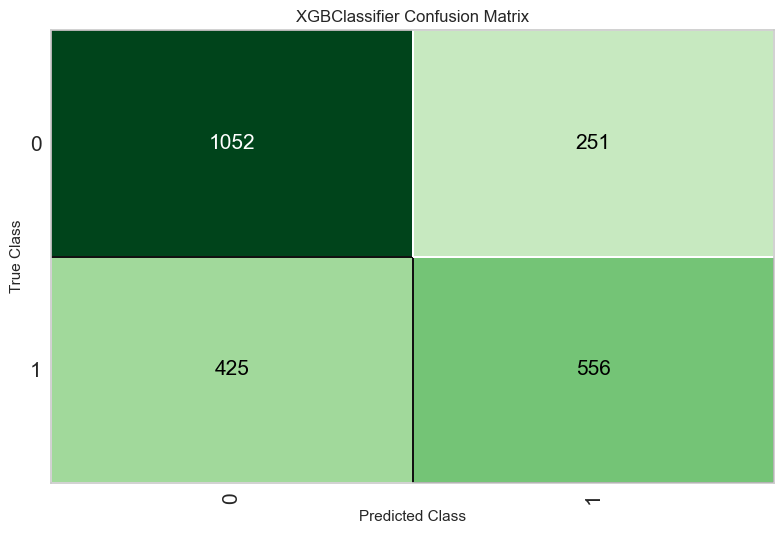

In [17]:
plot_model(best, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

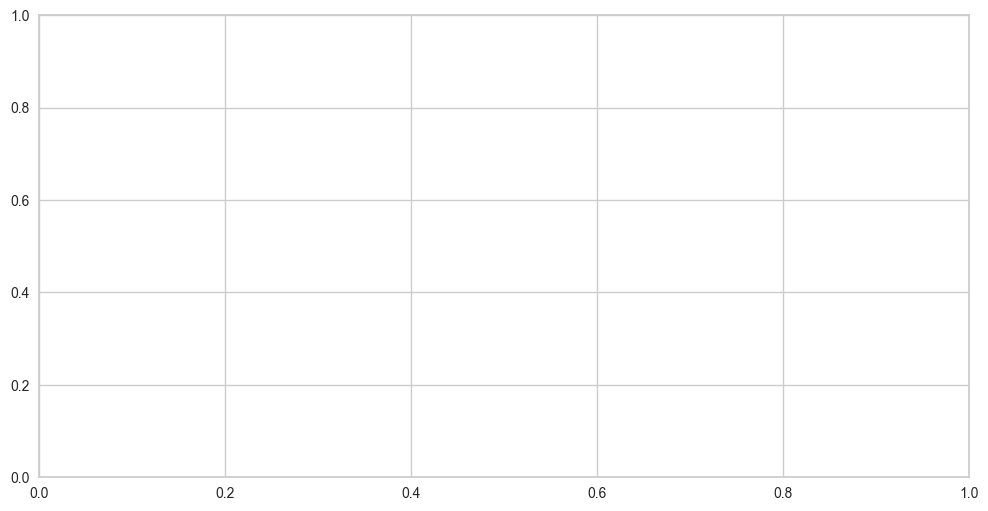

In [18]:
evaluate_model(best)

In [24]:
padded_sequences_test

array([[135,   1,  41, ...,   0,   0,   0],
       [100, 179,   1, ...,   0,   0,   0],
       [ 86,   4, 544, ...,   0,   0,   0],
       ...,
       [621, 323, 303, ...,   0,   0,   0],
       [  1, 170, 295, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0]])

In [25]:
test_t = pd.DataFrame(padded_sequences_test, columns=['feature_1', 'feature_2', 'feature_3','feature_4','feature_5',
                                                   'feature_6','feature_7','feature_8','feature_9','feature_10',
                                                   'feature_11','feature_12','feature_13','feature_14','feature_15',
                                                   'feature_16','feature_17','feature_18','feature_19','feature_20',
                                                   'feature_21','feature_22','feature_23','feature_24','feature_25',
                                                   'feature_26','feature_27','feature_28', 'feature_29','feature_30'])
test_t.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,135,1,41,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100,179,1,116,375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,4,544,1,1,1,345,2,98,0,...,0,0,0,0,0,0,0,0,0,0
3,265,1,1,75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,156,522,12,317,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
predictions = predict_model(best, data = test_t)
predictions

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,prediction_label,prediction_score
0,135,1,41,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.6647
1,100,179,1,116,375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.6507
2,86,4,544,1,1,1,345,2,98,0,...,0,0,0,0,0,0,0,0,0,0.5265
3,265,1,1,75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.8438
4,156,522,12,317,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.7162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,179,654,1,1,654,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.7882
3259,30,1,81,242,565,141,1,25,3,20,...,0,0,0,0,0,0,0,0,1,0.9521
3260,621,323,303,648,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.5639
3261,1,170,295,194,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.8095


In [27]:
df_id = pd.DataFrame({'id':test['id']})
#df_dpp = pd.DataFrame(yhat_class,columns=['target'])  
df_py = pd.concat([df_id, predictions['prediction_label']],axis=1)
df_py.head()

,id,prediction_label
0,0,0
1,2,0
2,3,0
3,9,0
4,11,1


In [28]:
df_py.rename({'prediction_label':'target'}, axis=1, inplace=True)
df_py.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,1


In [24]:
df_py.to_csv('target_py.csv', index=False)

### Deep Learning

In [15]:
model = None

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(800, 16, input_length=30),
    tf.keras.layers.GlobalAveragePooling1D(), #Flatten() or GlobalAveragePooling1D()
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            12800     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 12,909
Trainable params: 12,909
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(padded_sequences, labels, epochs=10, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 3s 7ms/step - loss: 0.6793 - accuracy: 0.5727 - val_loss: 0.6812 - val_accuracy: 0.5345
Epoch 2/10
191/191 [==============================] - 1s 4ms/step - loss: 0.6525 - accuracy: 0.5956 - val_loss: 0.6492 - val_accuracy: 0.5916
Epoch 3/10
191/191 [==============================] - 1s 4ms/step - loss: 0.5983 - accuracy: 0.7020 - val_loss: 0.5846 - val_accuracy: 0.7433
Epoch 4/10
191/191 [==============================] - 1s 4ms/step - loss: 0.5213 - accuracy: 0.7819 - val_loss: 0.5242 - val_accuracy: 0.7814
Epoch 5/10
191/191 [==============================] - 1s 4ms/step - loss: 0.4714 - accuracy: 0.8015 - val_loss: 0.4910 - val_accuracy: 0.7938
Epoch 6/10
191/191 [==============================] - 1s 4ms/step - loss: 0.4420 - accuracy: 0.8102 - val_loss: 0.4688 - val_accuracy: 0.7997
Epoch 7/10
191/191 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8151 - val_loss: 0.4630 - val_accuracy: 0.8024
Epoch 

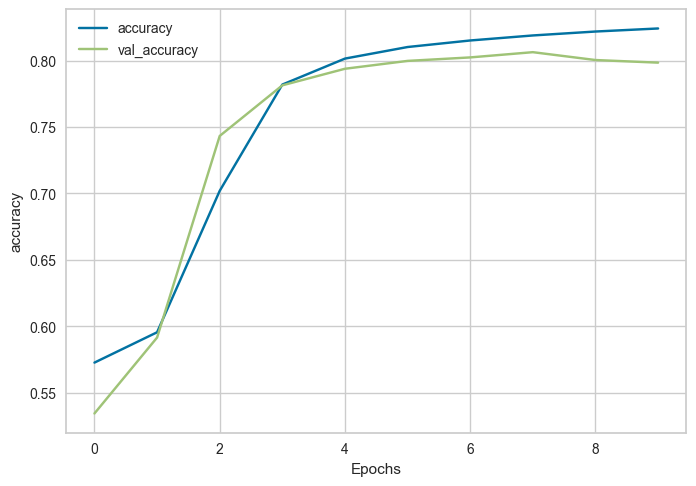

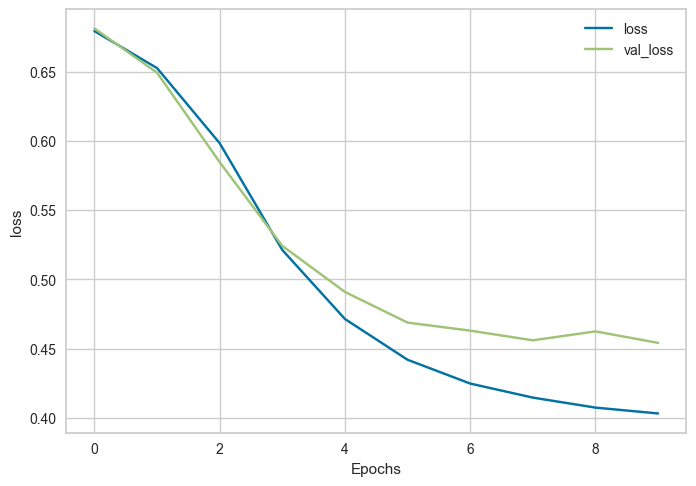

In [32]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [33]:
classes = model.predict(padded_sequences_test)

102/102 [==============================] - 0s 3ms/step


In [34]:
yhat_class = [1 if x>=0.5 else 0 for x in classes]
print(yhat_class[:5])

[1, 1, 1, 1, 1]


In [35]:
df_id = pd.DataFrame({'id':test['id']})
df_dpp = pd.DataFrame(yhat_class,columns=['target'])  
df_dpp = pd.concat([df_id, df_dpp],axis=1)
df_dpp.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [38]:
df_dpp.to_csv('target_emb.csv', index=False)

### LETS USE LSTM

In [39]:
len(padded_sequences)

7613

In [40]:
model = None

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(7613, 16, input_length=30),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 16)            121808    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 126,577
Trainable params: 126,577
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(padded_sequences, labels, epochs=10, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 14s 32ms/step - loss: 0.6114 - accuracy: 0.6611 - val_loss: 0.4963 - val_accuracy: 0.7787
Epoch 2/10
191/191 [==============================] - 4s 21ms/step - loss: 0.4474 - accuracy: 0.8000 - val_loss: 0.4511 - val_accuracy: 0.7958
Epoch 3/10
191/191 [==============================] - 5s 26ms/step - loss: 0.4128 - accuracy: 0.8202 - val_loss: 0.4604 - val_accuracy: 0.7938
Epoch 4/10
191/191 [==============================] - 5s 24ms/step - loss: 0.4027 - accuracy: 0.8236 - val_loss: 0.4757 - val_accuracy: 0.7800
Epoch 5/10
191/191 [==============================] - 5s 24ms/step - loss: 0.3944 - accuracy: 0.8294 - val_loss: 0.4876 - val_accuracy: 0.7761
Epoch 6/10
191/191 [==============================] - 4s 21ms/step - loss: 0.3858 - accuracy: 0.8343 - val_loss: 0.4984 - val_accuracy: 0.7663
Epoch 7/10
191/191 [==============================] - 4s 22ms/step - loss: 0.3796 - accuracy: 0.8363 - val_loss: 0.5100 - val_accuracy: 0.764

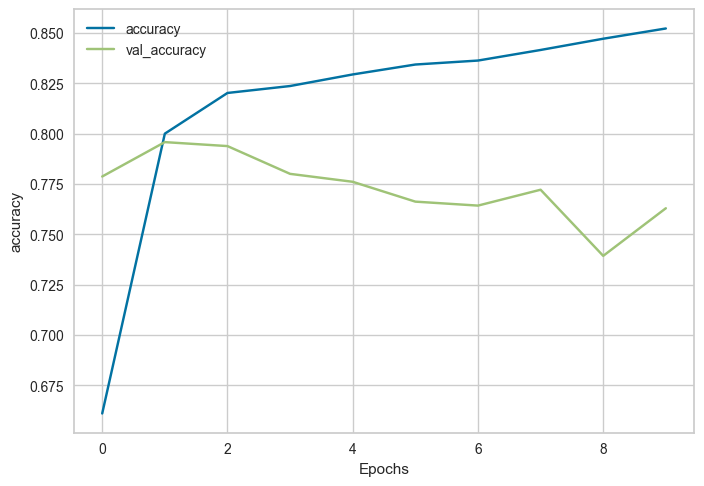

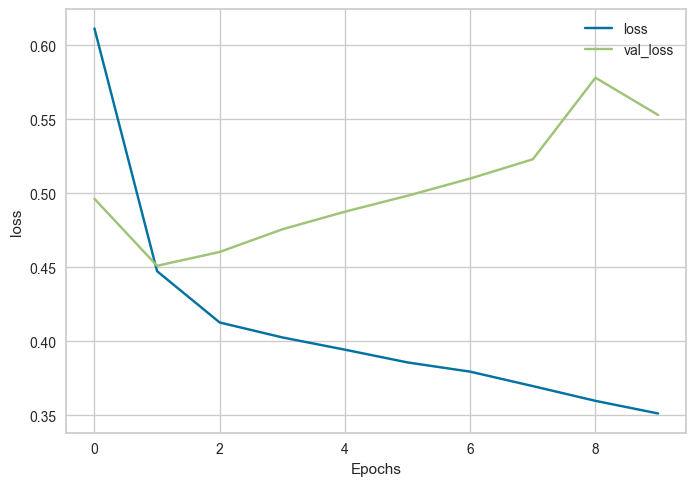

In [44]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Lets Use CONVD1

In [45]:
len(padded_sequences)

7613

In [46]:
model_1 = None

In [47]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(7613, 16, input_length=30),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(), #Flatten() or GlobalAveragePooling1D()
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_1.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [48]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 16)            121808    
                                                                 
 conv1d (Conv1D)             (None, 26, 128)           10368     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 132,957
Trainable params: 132,957
Non-trainable params: 0
________________________________________________

In [49]:
history = model_1.fit(padded_sequences, labels, epochs=10, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 4s 10ms/step - loss: 0.6305 - accuracy: 0.6465 - val_loss: 0.5222 - val_accuracy: 0.7466
Epoch 2/10
191/191 [==============================] - 2s 9ms/step - loss: 0.4630 - accuracy: 0.7938 - val_loss: 0.4593 - val_accuracy: 0.7794
Epoch 3/10
191/191 [==============================] - 1s 7ms/step - loss: 0.4301 - accuracy: 0.8120 - val_loss: 0.4632 - val_accuracy: 0.7859
Epoch 4/10
191/191 [==============================] - 2s 8ms/step - loss: 0.4146 - accuracy: 0.8181 - val_loss: 0.4694 - val_accuracy: 0.7840
Epoch 5/10
191/191 [==============================] - 1s 7ms/step - loss: 0.4043 - accuracy: 0.8263 - val_loss: 0.4918 - val_accuracy: 0.7827
Epoch 6/10
191/191 [==============================] - 1s 7ms/step - loss: 0.3979 - accuracy: 0.8315 - val_loss: 0.4863 - val_accuracy: 0.7833
Epoch 7/10
191/191 [==============================] - 1s 7ms/step - loss: 0.3923 - accuracy: 0.8332 - val_loss: 0.4983 - val_accuracy: 0.7781
Epoch

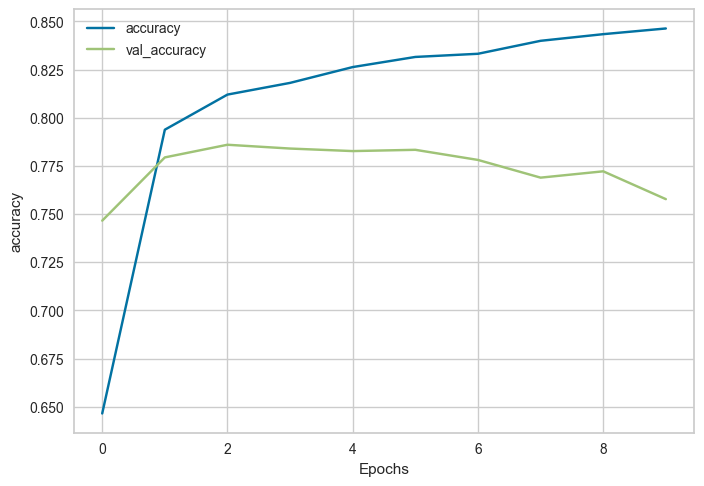

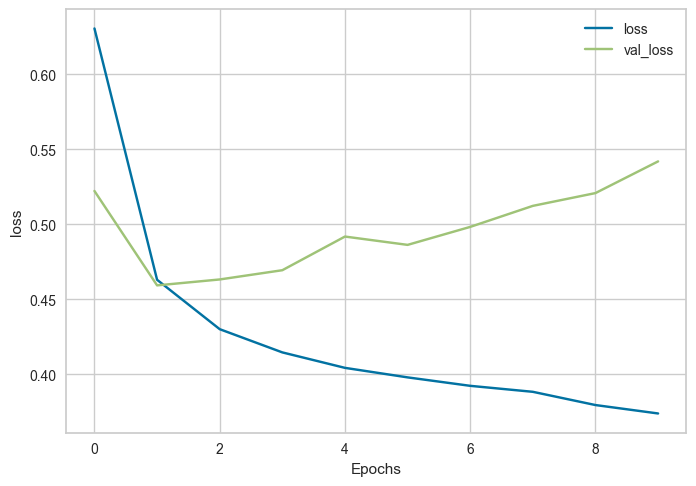

In [50]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Using Pretrained

In [65]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import os

In [66]:
X = train[['text_cleaned']]
y = train[['target']]
test1 = test[['text_cleaned']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5709, 1)
(1904, 1)
(5709, 1)
(1904, 1)


In [67]:
model = None
# embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
# embedding = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"

In [74]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, Trainable=True)

model = Sequential()
model.add(hub_layer)
model.add(Dense(4, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose=1)

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
classes = model.predict(test1)

In [ ]:
yhat_class = [1 if x>=0.5 else 0 for x in classes]
print(yhat_class[:5])

In [ ]:
df_id = pd.DataFrame({'id':test['id']})
df_tl = pd.DataFrame(yhat_class,columns=['target'])  
df_tl = pd.concat([df_id, df_tl],axis=1)
df_tl.head()

In [ ]:
df_tl.to_csv('target_tf3.csv', index=False)

### Using AutoML

In [ ]:
!pip3 install auto-sklearn

In [ ]:
import autosklearn.classification

In [ ]:
X = train[['text_cleaned']]
y = train[['target']]
test = test[['text_cleaned']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60
                                                         per_run_time_limit=30)

automl.fit(X_train, y_train)

In [ ]:
print(automl.leaderboard())

In [ ]:
predictions = automl.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test, predictions))